# Load the packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from nibabel.testing import data_path
import nibabel as nib
import nrrd

In [4]:
import os
import random

# Load the image Reso_AP

In [5]:
img_AP, inf_AP = nrrd.read('./20093700_image/Reso_AP.nrrd')

In [6]:
img_AP.shape

(664, 664, 42)

In [7]:
inf_AP

OrderedDict([('type', 'short'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([664, 664,  42])),
             ('space directions', array([[0.5, 0. , 0. ],
                     [0. , 0.5, 0. ],
                     [0. , 0. , 5. ]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'gzip'),
             ('space origin',
              array([-158.67578125, -324.67578125, -220.        ]))])

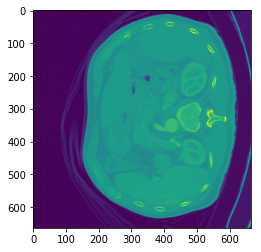

In [8]:
plt.imshow(img_AP[:,:,20])

# Load the image Regi_reso_DP

In [9]:
img_DP, inf_DP = nrrd.read('./20093700_image/Regi_reso_DP.nrrd')

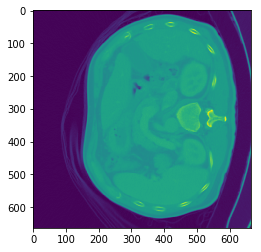

In [10]:
plt.imshow(img_DP[:,:,20])

# Load the image Regi_Reso_PC

In [11]:
img_PC, inf_PC = nrrd.read('./20093700_image/Regi_Reso_PC.nrrd')

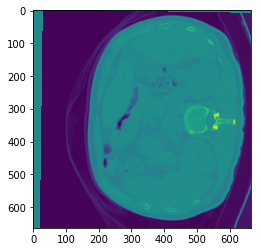

In [12]:
plt.imshow(img_PC[:,:,20])

In [13]:
np.max(img_PC), np.min(img_PC)

(1271.9331, -1023.30286)

# Load the label Reso_AP-label

In [14]:
label_img_AP, label_inf_AP = nrrd.read('./20093700_image/Reso_AP-label.nrrd')

In [15]:
label_img_AP.shape

(664, 664, 42)

In [16]:
label_inf_AP

OrderedDict([('type', 'short'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([664, 664,  42])),
             ('space directions', array([[0.5, 0. , 0. ],
                     [0. , 0.5, 0. ],
                     [0. , 0. , 5. ]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'gzip'),
             ('space origin',
              array([-158.67578125, -324.67578125, -220.        ]))])

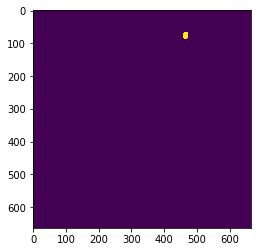

In [17]:
plt.imshow(label_img_AP[:,:,20])

# Combine the slice image and the slice label

In [18]:
import pre_processing as pp

In [19]:
Combi_reso_PC = pp.combine_image_mask(image=img_PC, mask=label_img_AP)

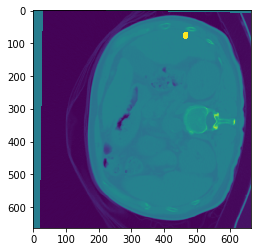

In [20]:
plt.imshow(Combi_reso_PC[:,:,20])

# Randomly change the shape

In [21]:
import change_shape as chg

In [23]:
# from importlib import reload

In [29]:
# reload(chg)
# import change_shape as chg

# Test

In [30]:
changed_mask = chg.Random_change_shape(label_img_AP,2,1,3, -1,-1,-1, 0.8, 0.8, 0.9, 0)

In [31]:
changed_mask.shape

(664, 664, 42)

In [32]:
np.max(label_img_AP), np.min(label_img_AP), np.max(changed_mask), np.min(changed_mask)

(1, 0, 1.0, 0.0)

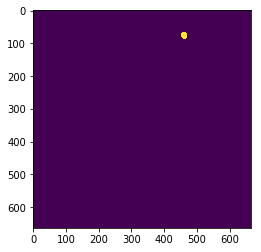

In [33]:
plt.imshow(label_img_AP[:,:,19])

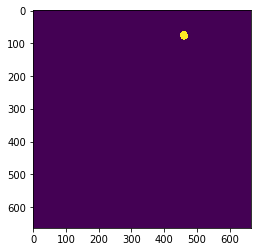

In [34]:
plt.imshow(changed_mask[:,:,19])

# Combine

In [35]:
changed_combine_image_mask = pp.combine_image_mask(image=img_AP, mask=changed_mask)

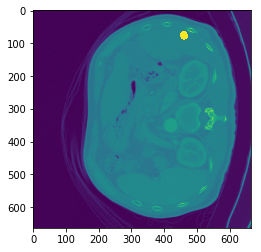

In [36]:
plt.imshow(changed_combine_image_mask[...,19])

# Normalization

In [38]:
np.max(img_AP[changed_mask>0]) , np.min(img_AP[changed_mask>0]) 

(88, -2)

In [39]:
Norm_img_AP = pp.image_normalize(image=img_AP, mask=changed_mask, map_min=0 , map_max=256)

In [40]:
np.max(Norm_img_AP[changed_mask>0]), np.min(Norm_img_AP[changed_mask>0])

(256, 0)

# Radiomics

In [41]:
from radiomics import featureextractor
import SimpleITK as sitk

In [42]:
extractor = featureextractor.RadiomicsFeaturesExtractor()
extractor

In [43]:
result = extractor.execute(
                    sitk.GetImageFromArray(Norm_img_AP),
                    sitk.GetImageFromArray(changed_mask.astype(int)))

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [44]:
print("Result type:", type(result))  # result is returned in a Python ordered dictionary
print("")
print("Calculated features")

for key, value in result.items():
    print("\t", key, ":", value)

Result type: <class 'collections.OrderedDict'>

Calculated features
	 general_info_BoundingBox : (19, 447, 63, 3, 29, 28)
	 general_info_EnabledImageTypes : {'Original': {}}
	 general_info_GeneralSettings : {'minimumROIDimensions': 1, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'enableCExtensions': True, 'additionalInfo': True}
	 general_info_ImageHash : fdfb66410d39b54a3b33b90ef34e2e0d7ec97f57
	 general_info_ImageSpacing : (1.0, 1.0, 1.0)
	 general_info_MaskHash : 4c911ac85d1e5d106f502024358db533d20763db
	 general_info_NumpyVersion : 1.15.3
	 general_info_PyWaveletVersion : 0.5.2
	 general_info_SimpleITKVersion : 1.1.0
	 general_info_Version : 1.3.0.post92+g974a734
	 general_info_VolumeNum : 1
	 general_info_VoxelNum : 1276
	 original_shape_Elongation

# Continue